In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
sample_data = pd.read_csv("SRR1068687.tsv",sep="\t")

# HK genes column names
HK_rows = "housekeeping_genes_rownumber_id.txt"
rowIdHKGenes = [int(i.strip().split('\t')[0])-2 for i in list(open(HK_rows))]
HK_names_tmp = sample_data.target_id[rowIdHKGenes]
HK_names = [name.split("|")[5] for name in HK_names_tmp.tolist()]

HK_df = pd.read_csv("housekeeping_genes_tpm_matrix_3282.txt", sep="\t",header=None)
HK_df.columns = ["individual","tissue"] + HK_names

In [5]:
def getLog(x):
    return np.log10(x+1)

In [6]:
logHK_df = HK_df.iloc[:,2:15].apply(getLog)
logHK_df.columns = HK_names

logHK_df = pd.concat([HK_df.iloc[:,0:2],logHK_df],axis=1)


In [7]:
logHK_df.head()

,individual,tissue,PGD,RBM8A,ADAR,UBE2D2,MGAT1,TACC1,TALDO1,E2F4,AATF,BSG,NDUFA7,YWHAB,SOD1
0,GTEX-PW2O,Lung,1.969592,1.014305,1.155964,1.301182,0.000000,0.922353,2.007671,1.576454,1.381420,0.174809,1.385690,1.025704,2.041602
1,GTEX-NPJ8,Brain - Amygdala,1.543982,1.063754,0.427415,1.277506,0.095250,0.561246,1.624756,1.074849,1.148158,0.163601,1.437014,0.964905,2.455685
2,GTEX-N7MT,Brain - Caudate (basal ganglia),1.647071,1.222272,0.787730,1.429578,0.358455,0.856771,1.761940,1.311394,1.348616,0.292817,1.711867,0.878832,2.628693
3,GTEX-OHPK,Lung,2.120400,0.995306,0.488609,1.236318,0.234945,0.891802,2.133794,1.697975,1.391924,0.214681,1.378607,0.924182,2.149613
4,GTEX-Q2AG,Skin - Sun Exposed (Lower leg),1.636687,1.005003,0.466268,1.270881,0.156346,0.686178,1.871572,1.432491,1.432421,0.358881,1.117894,0.849542,2.131285


In [10]:
logHK_df.columns[range(2,15)]

Index([u'PGD', u'RBM8A', u'ADAR', u'UBE2D2', u'MGAT1', u'TACC1', u'TALDO1',
       u'E2F4', u'AATF', u'BSG', u'NDUFA7', u'YWHAB', u'SOD1'],
      dtype='object')

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffb44c3050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fffb3d70790>]], dtype=object)

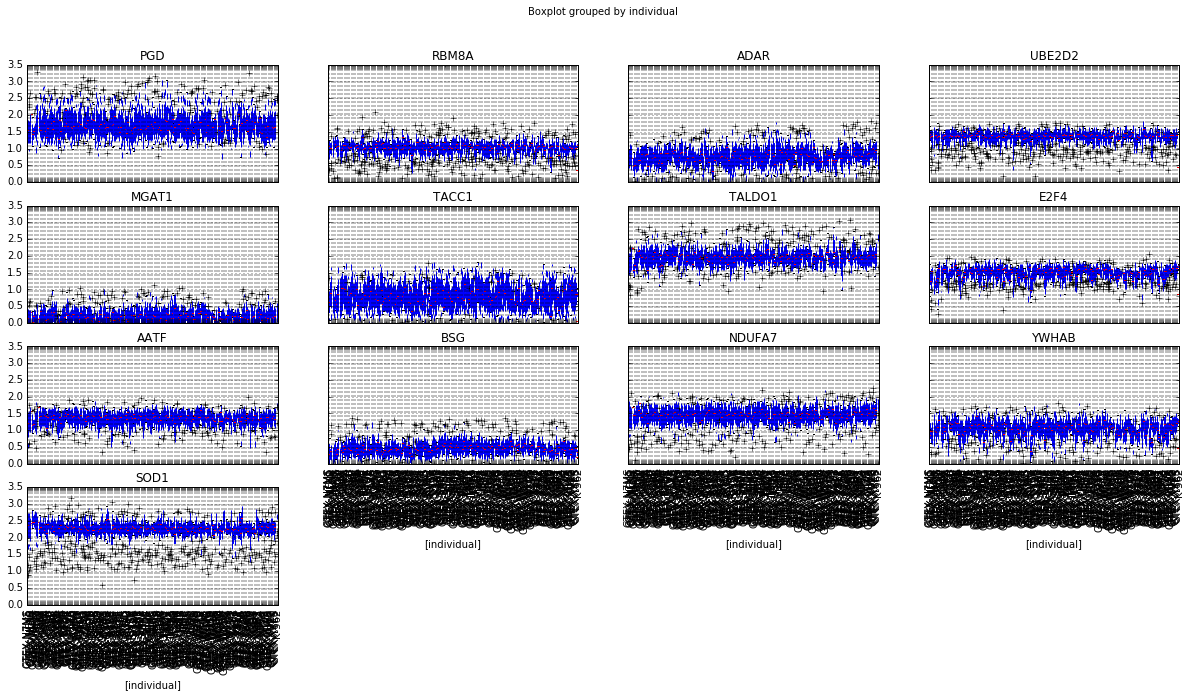

In [11]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

logHK_df.boxplot(column=list(logHK_df.columns[range(2,15)]),by=["individual"],rot=90)

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fff94dce5d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fff93f03a10>]], dtype=object)

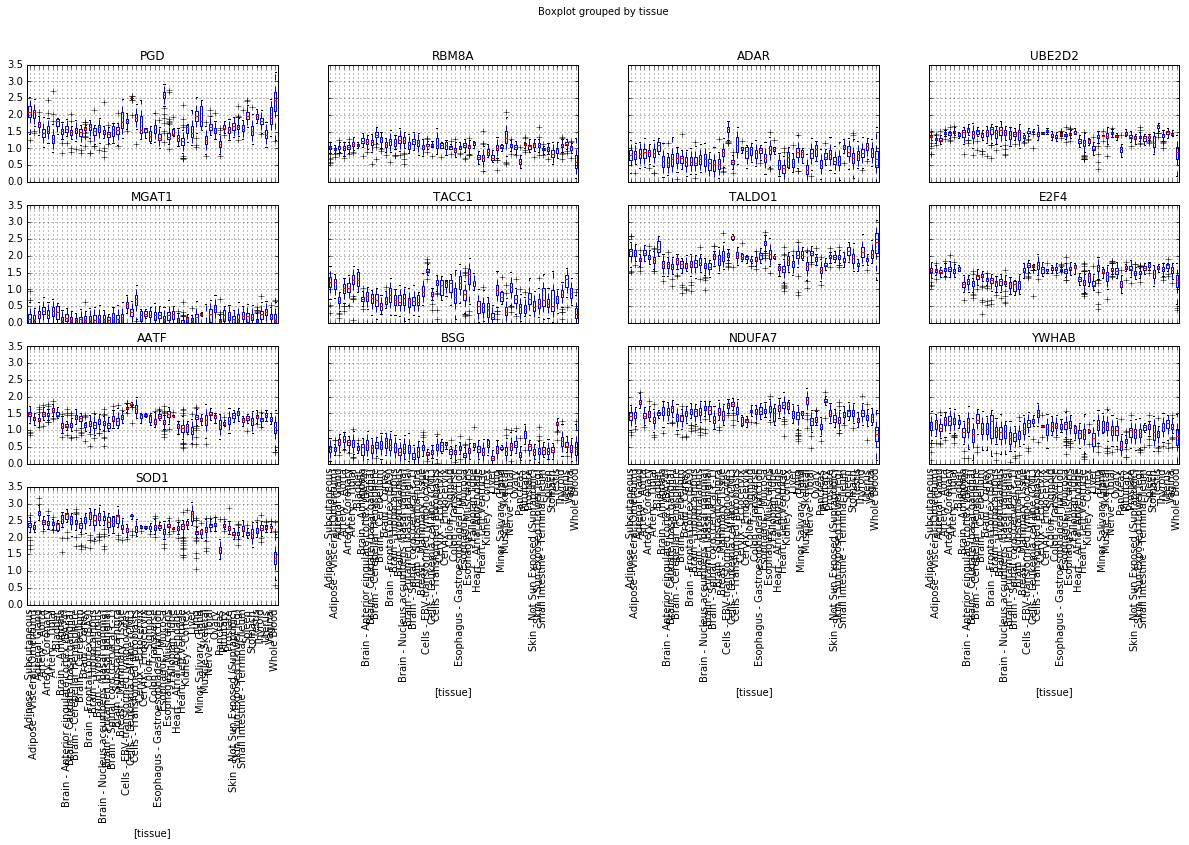

In [12]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

logHK_df.boxplot(column=list(logHK_df.columns[range(2,15)]),by=["tissue"],rot=90)

In [23]:
def normalize_HK(row):
    mean_hk = np.mean(row[2:15])
    adjusted = row[2:15]/mean_hk
    return pd.concat([row[0:2],adjusted])

In [25]:
norm_logHK_df = logHK_df.apply(normalize_HK,axis=1)

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fff8215fd10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fff81f2da90>]], dtype=object)

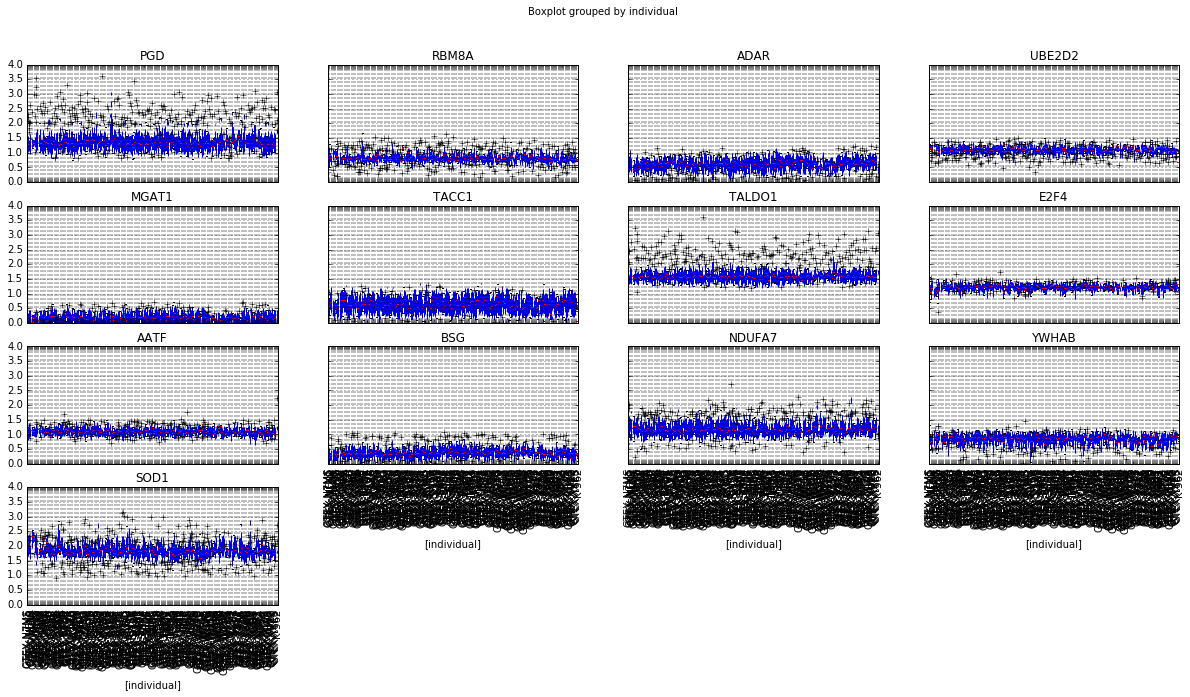

In [26]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

norm_logHK_df.boxplot(column=list(norm_logHK_df.columns[range(2,15)]),by=["individual"],rot=90)

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fff64fd0090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fff642e0190>]], dtype=object)

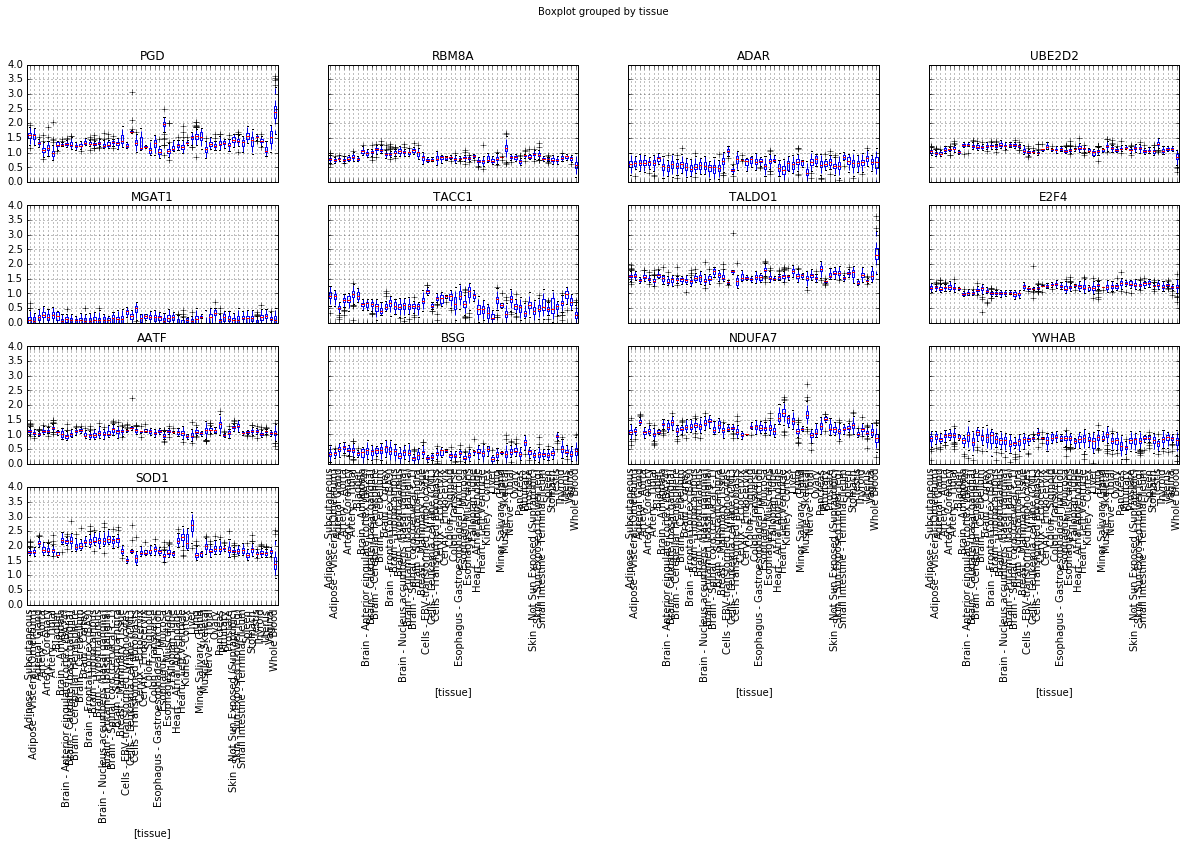

In [27]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

norm_logHK_df.boxplot(column=list(norm_logHK_df.columns[range(2,15)]),by=["tissue"],rot=90)

In [35]:
sample_data = pd.read_csv("SRR1068687.tsv",sep="\t")

# column names

rows1 = "mitonuclear_genes_rowNumber_id.txt"
rowIdNucGenes = [int(i.strip().split('\t')[0])-2 for i in list(open(rows1))]
rowIdMitGenes = range(198582,198619)
rowIdNumts = range(198619,198681)
allrows = rowIdNucGenes+rowIdMitGenes+rowIdNumts

dataset_tmp_names = sample_data.target_id[allrows]
dataset_names = [name.split("|")[5] if len(name.split("|"))>1 else "_".join(name.split("_")[3:5]) for name in dataset_tmp_names.tolist()]


raw = pd.read_csv("mitonuc_mito_numt_tpm_matrix_3282.txt",sep="\t",header=None)
raw.columns = ["individual","tissue"] + dataset_names
raw = pd.concat([raw,HK_df.iloc[:,2:]],axis=1)

In [36]:
raw.head(2)

,individual,tissue,PUSL1,AURKAIP1,MRPL20,ATAD3B,ATAD3A,ACOT7,DNAJC11,PARK7,...,UBE2D2,MGAT1,TACC1,TALDO1,E2F4,AATF,BSG,NDUFA7,YWHAB,SOD1
0,GTEX-PW2O,Lung,7.23699,5.74038,5.700390,5.00871,0.419514,0.000000,17.72050,6.40239,...,19.0070,0.00000,7.36282,100.782,36.7098,23.0669,0.495578,23.3047,9.60972,109.053
1,GTEX-NPJ8,Brain - Amygdala,4.18626,3.20400,0.734798,2.39418,0.000000,0.048411,9.12054,14.00450,...,17.9455,0.24523,2.64121,41.146,10.8809,13.0656,0.457474,26.3536,8.22370,284.552


In [37]:
log_raw = raw.iloc[:,2:].apply(getLog)
log_raw.columns = list(raw.columns[2:])

log_raw = pd.concat([raw.iloc[:,0:2],log_raw],axis=1)

In [38]:
log_raw.head(1)

,individual,tissue,PUSL1,AURKAIP1,MRPL20,ATAD3B,ATAD3A,ACOT7,DNAJC11,PARK7,...,UBE2D2,MGAT1,TACC1,TALDO1,E2F4,AATF,BSG,NDUFA7,YWHAB,SOD1
0,GTEX-PW2O,Lung,0.915769,0.828684,0.8261,0.778781,0.15214,0,1.272317,0.869372,...,1.301182,0,0.922353,2.007671,1.576454,1.38142,0.174809,1.38569,1.025704,2.041602


In [41]:
# column index of protein coding mitochondrial genes
cds_mito = [i for i in range(1129,1166) if not list(log_raw.columns[i].split("-")[1])[0] in ['T','R']]

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fff5d076350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fff5cce6490>]], dtype=object)

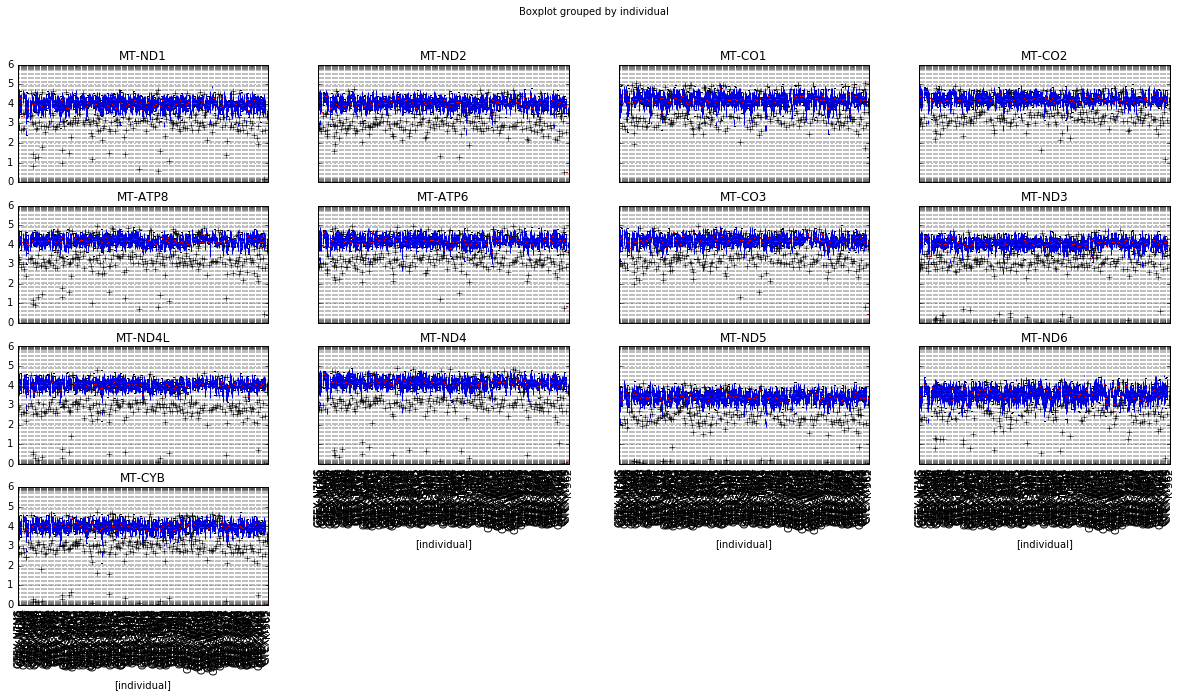

In [42]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

log_raw.iloc[:,[0,1]+cds_mito].boxplot(column=list(log_raw.columns[cds_mito]),by=["individual"],rot=90)

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fff45202f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fff32105b10>]], dtype=object)

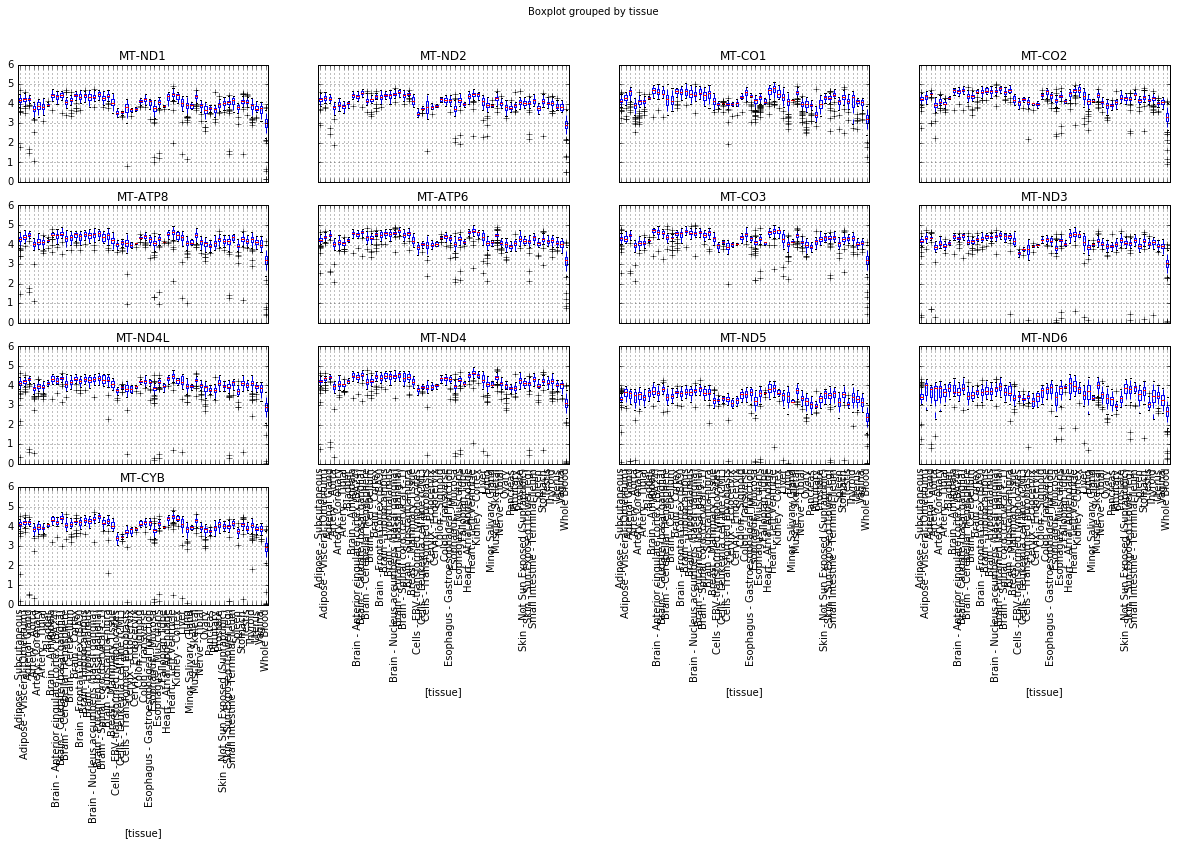

In [43]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

log_raw.iloc[:,[0,1]+cds_mito].boxplot(column=list(log_raw.columns[cds_mito]),by=["tissue"],rot=90)

In [55]:
def normalize_mito(entry):
    mean_hk = np.mean(entry[1228:1241])
    adjusted = entry[cds_mito]/mean_hk
    return pd.concat([entry[0:2],adjusted])

In [57]:
norm_log_raw = log_raw.apply(normalize_mito,axis=1)

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffb6cb4e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fffb461a550>]], dtype=object)

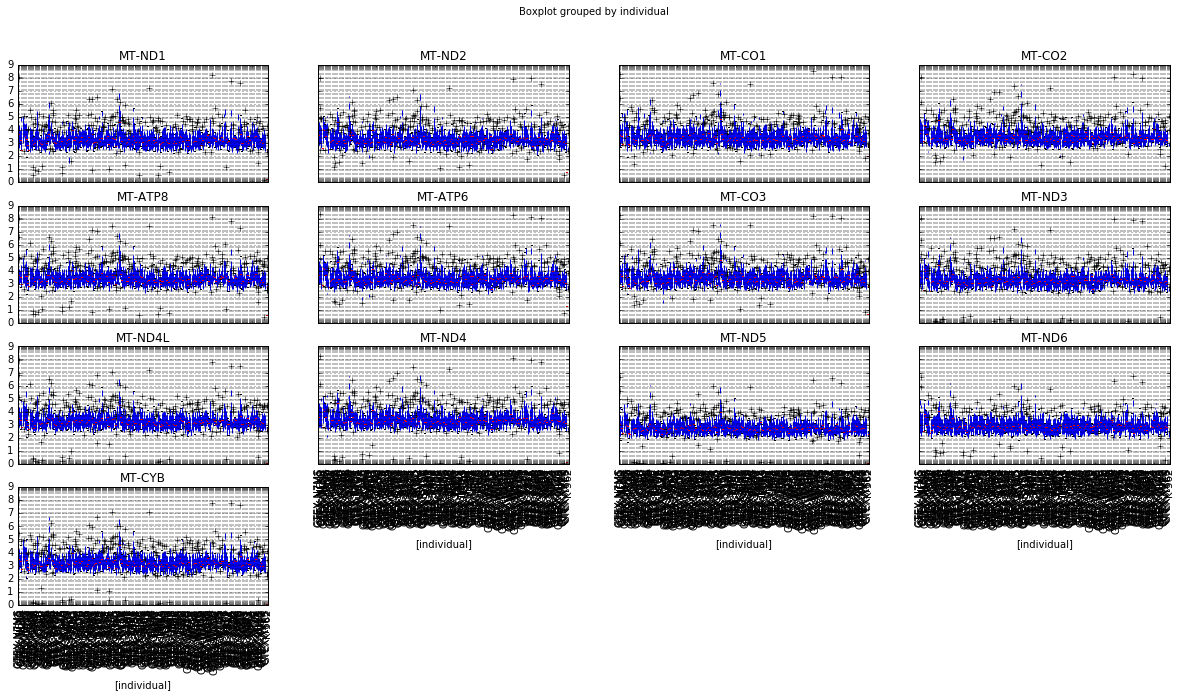

In [58]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

norm_log_raw.boxplot(column=list(norm_log_raw.columns[2:]),by=["individual"],rot=90)

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fff12cdf690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fff1eef2d10>]], dtype=object)

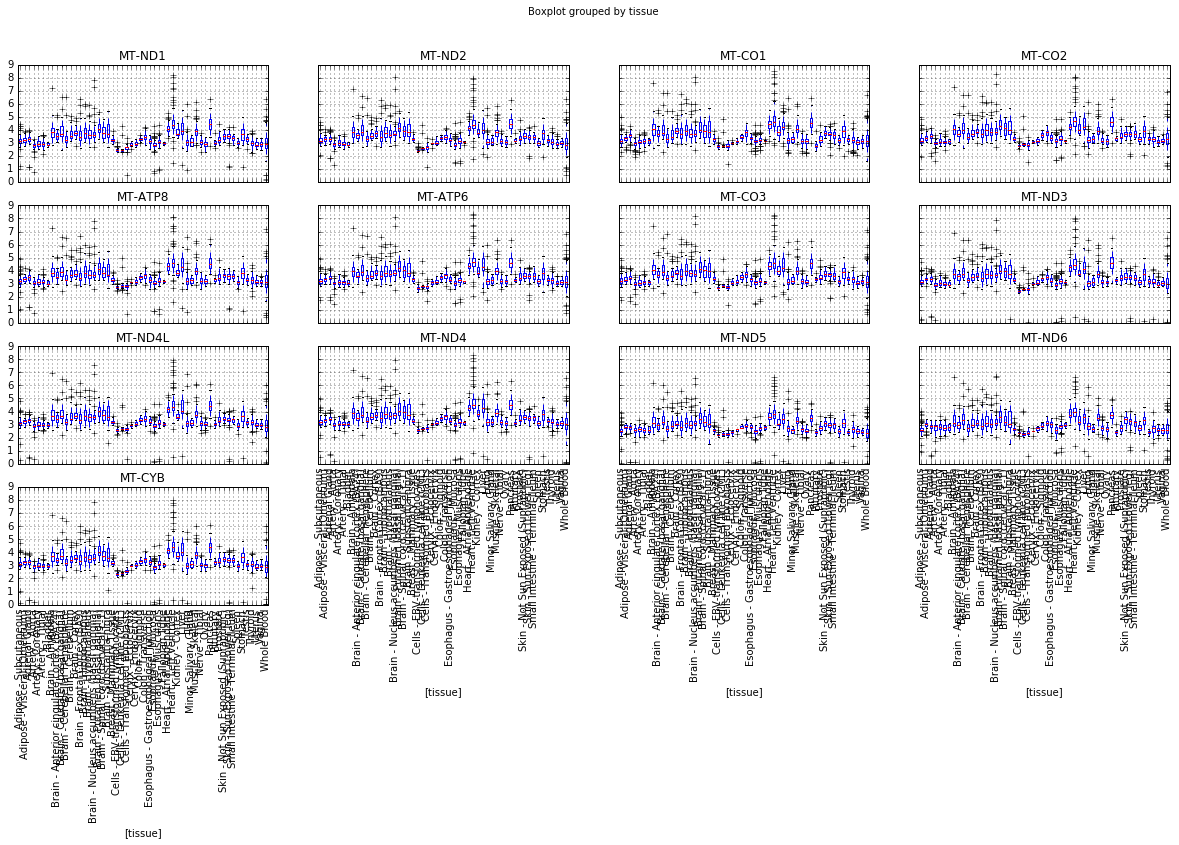

In [59]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

norm_log_raw.boxplot(column=list(norm_log_raw.columns[2:]),by=["tissue"],rot=90)

In [61]:
norm_log_raw.head(1)

,individual,tissue,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
0,GTEX-PW2O,Lung,3.264955,3.170976,3.586116,3.483423,3.394051,3.379545,3.270468,3.096769,3.385691,3.459913,2.86672,2.987513,3.152911


In [62]:
from sklearn.decomposition.pca import PCA

In [63]:
pca1 = PCA(n_components=2)
pca1.fit(norm_log_raw.iloc[:,2:])

PCA(copy=True, n_components=2, whiten=False)

In [64]:
pca1.explained_variance_ratio_

array([ 0.96136531,  0.0155619 ])

In [65]:
len(pca1.components_[0])

13

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


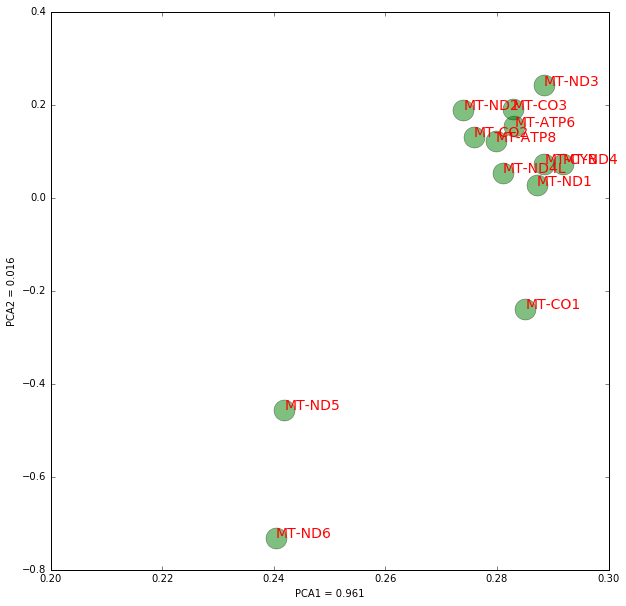

In [91]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

# PCA1 and PCA2 for all samples, using genes to identify variation

plt.plot(pca1.components_[0],pca1.components_[1],'o',markersize=21, color='green', alpha=0.5,label="mt_CDS")

axes = plt.gca()
axes.set_xlim([0.2,0.3])
axes.set_ylim([-0.8,0.4])

i=1
for xy in zip(pca1.components_[0],pca1.components_[1]):
    i+=1
    annotate(norm_log_raw.columns[i],xy=xy, color="red", fontsize=14)



plt.xlabel('PCA1 = %.3f' % pca1.explained_variance_ratio_[0])
plt.ylabel('PCA2 = %.3f' % pca1.explained_variance_ratio_[1])
#plt.legend()

In [92]:
pca2 = PCA(n_components=2)
pca2.fit(norm_log_raw.iloc[:,2:].transpose())

PCA(copy=True, n_components=2, whiten=False)

In [93]:
pca2.explained_variance_ratio_

array([ 0.80560986,  0.0843175 ])

In [94]:
len(pca2.components_[0])

3282

Populating the interactive namespace from numpy and matplotlib


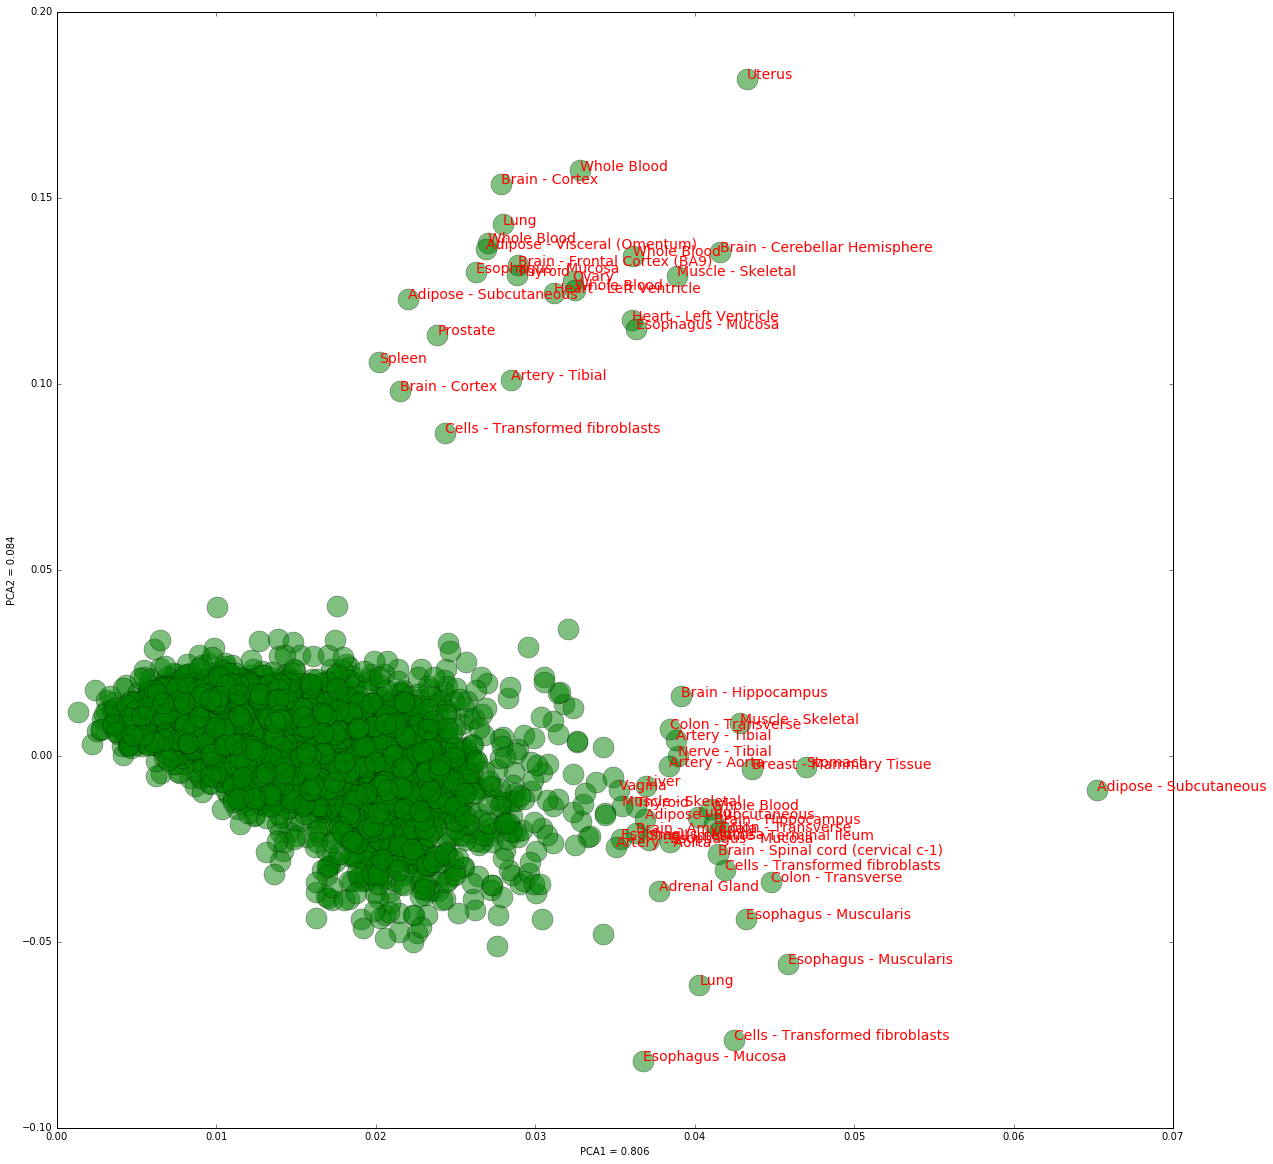

In [111]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)

# PCA1 and PCA2 for all samples, using genes to identify variation

plt.plot(pca2.components_[0],pca2.components_[1],'o',markersize=21, color='green', alpha=0.5,label="mt_CDS")

#axes = plt.gca()
#axes.set_xlim([0.2,0.3])
#axes.set_ylim([-0.8,0.4])

i=1
for xy in zip(pca2.components_[0],pca2.components_[1]):
    i+=1
    if xy[1]>0.05 or xy[0]>0.035:
        annotate(norm_log_raw.iloc[:,1][i],xy=xy, color="red", fontsize=14)
    else:
        pass


plt.xlabel('PCA1 = %.3f' % pca2.explained_variance_ratio_[0])
plt.ylabel('PCA2 = %.3f' % pca2.explained_variance_ratio_[1])

Populating the interactive namespace from numpy and matplotlib


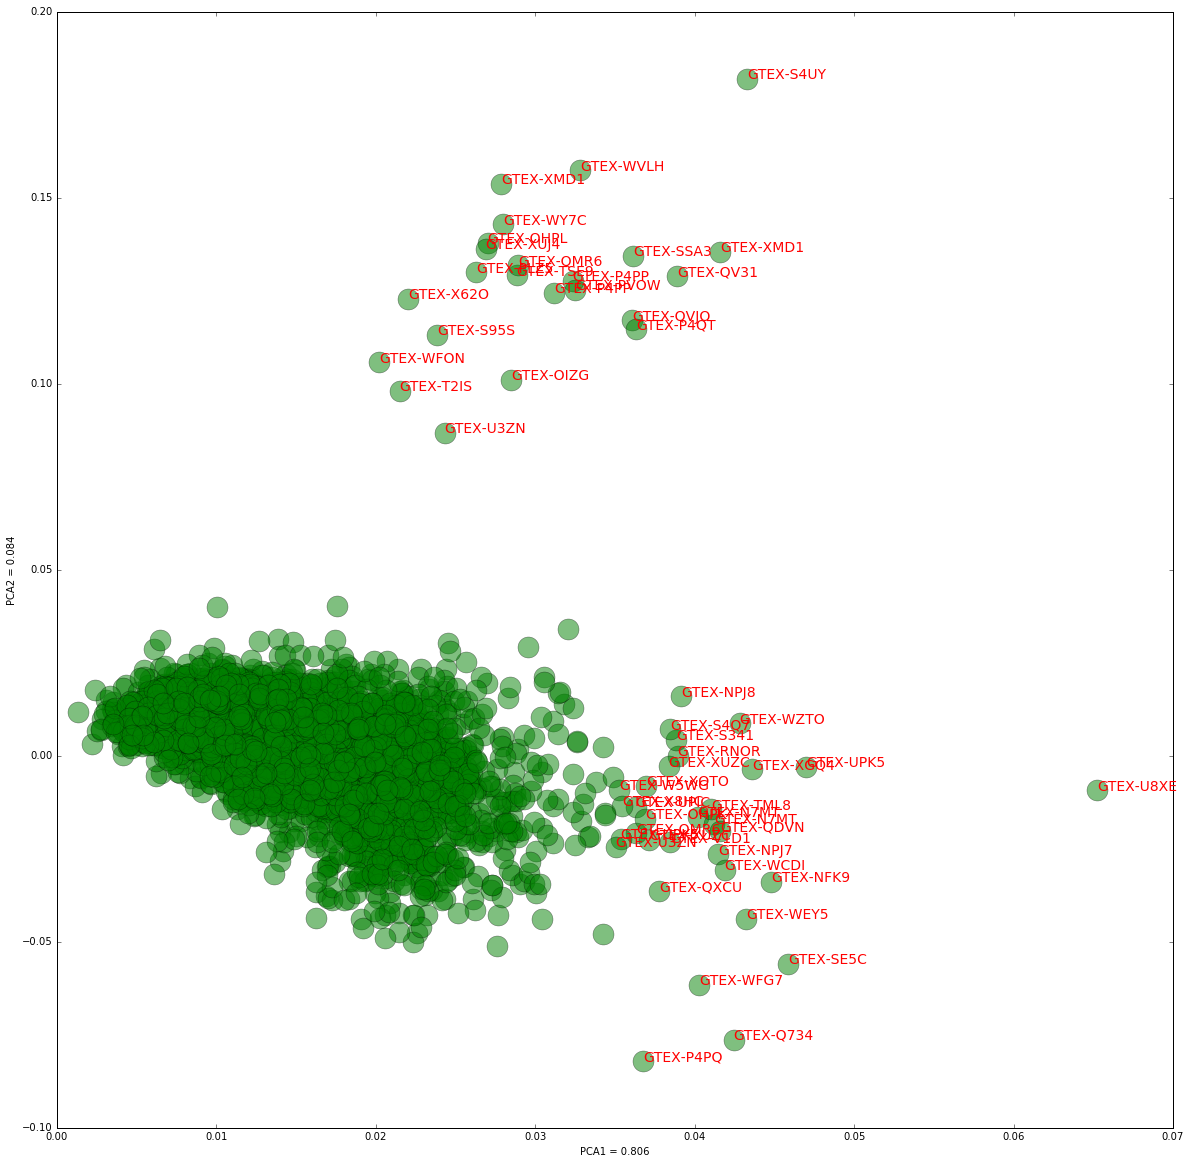

In [110]:
% pylab inline
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)

# PCA1 and PCA2 for all samples, using genes to identify variation

plt.plot(pca2.components_[0],pca2.components_[1],'o',markersize=21, color='green', alpha=0.5,label="mt_CDS")

#axes = plt.gca()
#axes.set_xlim([0.2,0.3])
#axes.set_ylim([-0.8,0.4])

i=1
for xy in zip(pca2.components_[0],pca2.components_[1]):
    i+=1
    if xy[1]>0.05 or xy[0]>0.035 :
        annotate(norm_log_raw.iloc[:,0][i],xy=xy, color="red", fontsize=14)
    else:
        pass


plt.xlabel('PCA1 = %.3f' % pca2.explained_variance_ratio_[0])
plt.ylabel('PCA2 = %.3f' % pca2.explained_variance_ratio_[1])

In [112]:
anomalous = []

i=1
for xy in zip(pca2.components_[0],pca2.components_[1]):
    i+=1
    if xy[1]>0.05 or xy[0]>0.035:
        anomalous.append( (norm_log_raw.iloc[:,0][i],norm_log_raw.iloc[:,1][i]) )
    else:
        pass

In [123]:
anomalous = pd.DataFrame(anomalous)
anomalous.columns = ["individual","tissue"]

/home/boris/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7ffbb03019d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffbb02dd7d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffbb02ecad0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffbb02ec490>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffbb0301bd0>,
  <matplotlib.lines.Line2D at 0x7ffbb0234e90>]}

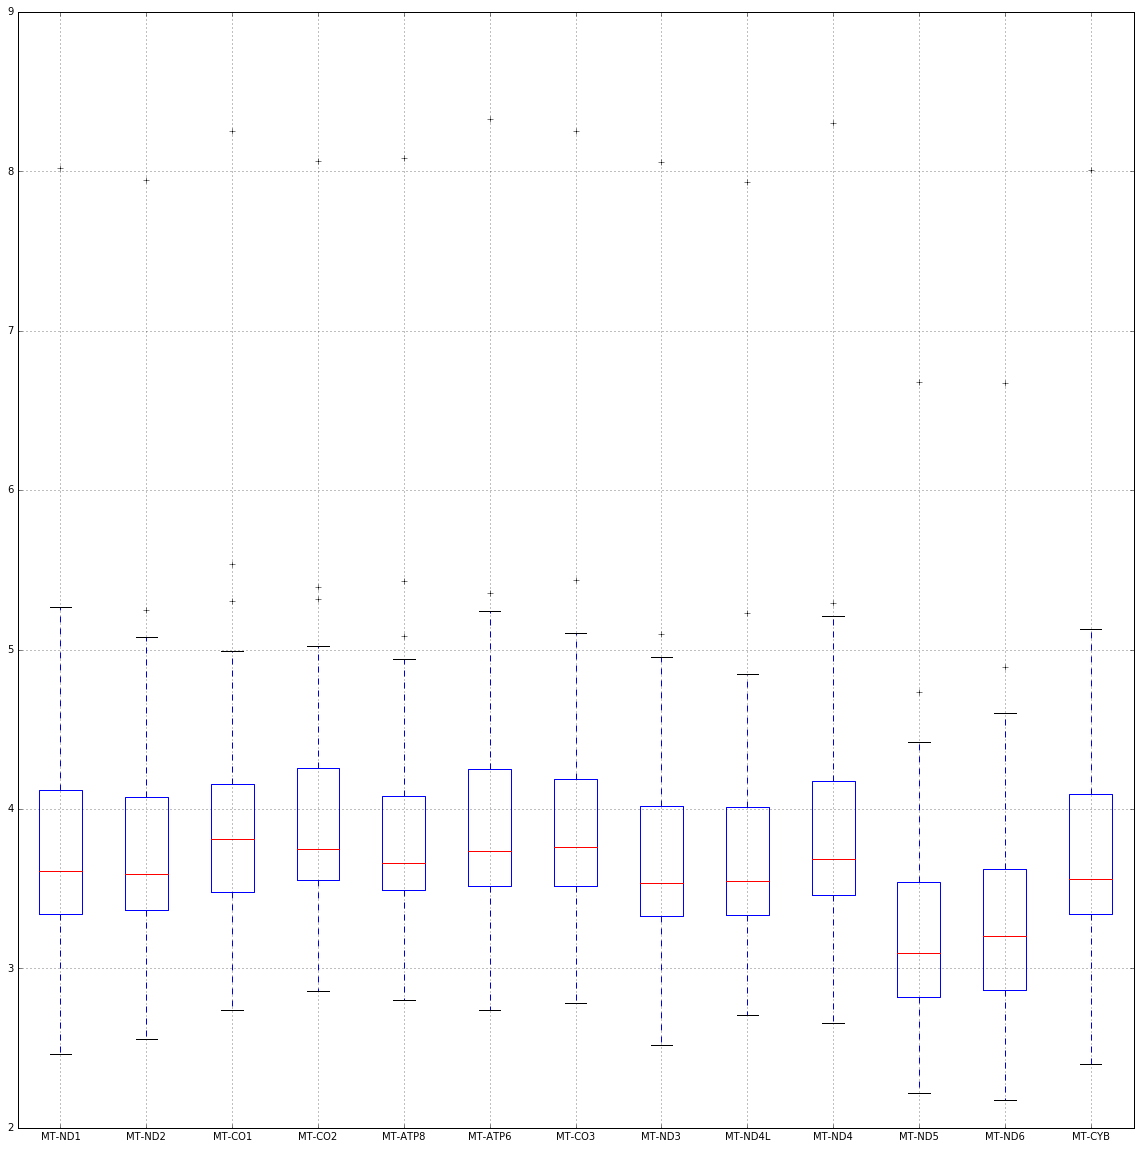

In [127]:
anomalous.join(norm_log_raw,lsuffix="an",rsuffix="dat").boxplot(column=list(norm_log_raw.columns[2:]))